In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [42]:
df_original = pd.read_csv("train.csv")
df_original

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


1) Análise Exploratória dos Dados:

In [43]:
df_original.head() #Linhas iniciais

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
df_original.info() #Informações sobre as colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
df_original.describe() #Estatísticas descritivas

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
df_original.shape #Quantidade de linhas e colunas

(1460, 81)

<Axes: xlabel='SaleCondition'>

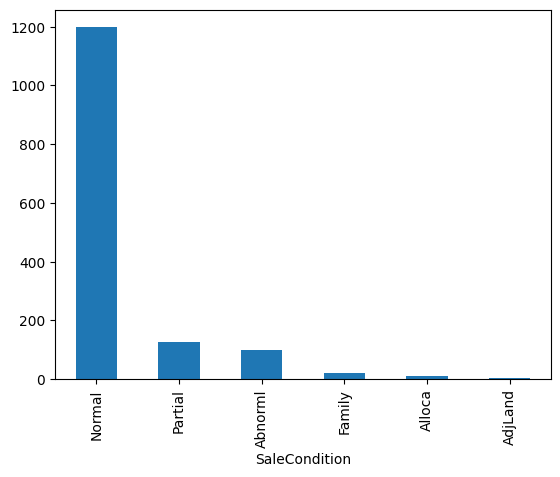

In [47]:
df_original['SaleCondition'].value_counts().plot(kind='bar')

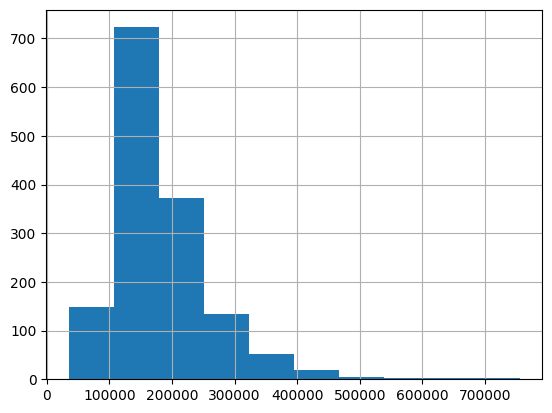

In [48]:
df_original['SalePrice'].hist()
plt.show()

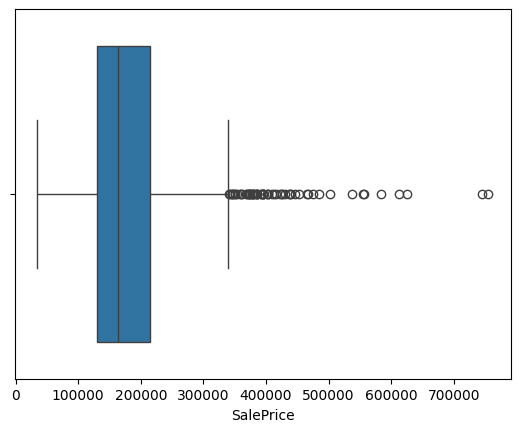

In [49]:
sns.boxplot(x=df_original['SalePrice'])
plt.show()

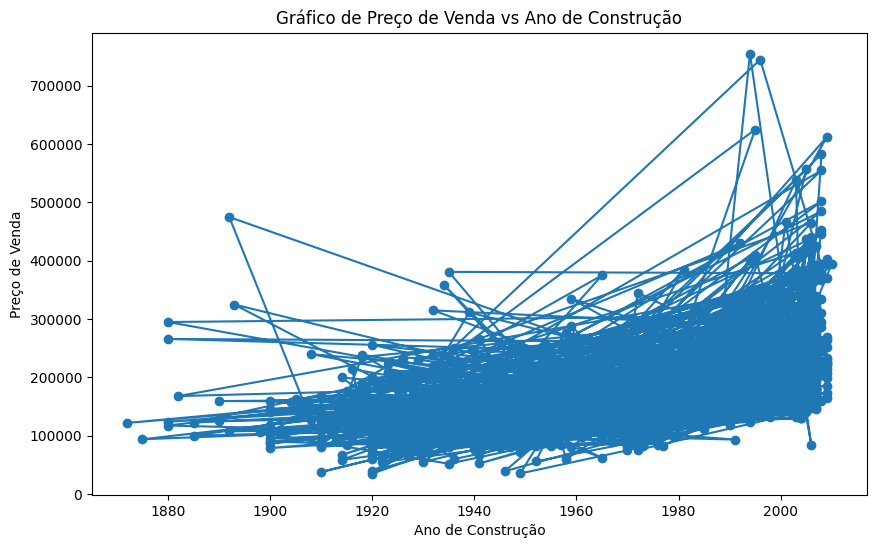

In [50]:
# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_original['YearBuilt'], df_original['SalePrice'], marker='o')

# Adicionando títulos e rótulos
plt.title('Gráfico de Preço de Venda vs Ano de Construção')
plt.xlabel('Ano de Construção')
plt.ylabel('Preço de Venda')

# Exibindo o gráfico
plt.show()

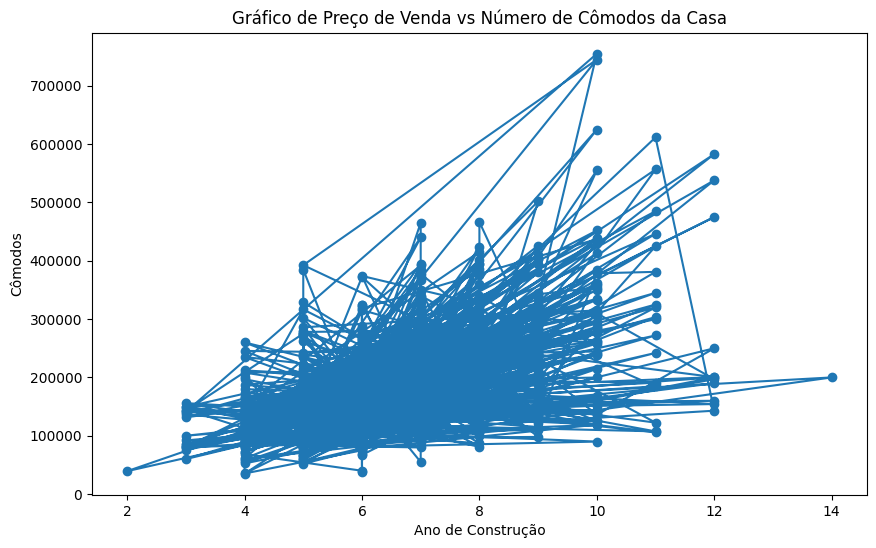

In [51]:
# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_original['TotRmsAbvGrd'], df_original['SalePrice'], marker='o')

# Adicionando títulos e rótulos
plt.title('Gráfico de Preço de Venda vs Número de Cômodos da Casa')
plt.xlabel('Ano de Construção')
plt.ylabel('Cômodos')

# Exibindo o gráfico
plt.show()

2)Feature Engineering

In [52]:
df_original.isnull().sum() #Quantidade de valores nulos

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [53]:

# Preenchendo os valores nulos das colunas categóricas com a moda
for column in df_original.select_dtypes(include=[object, 'category']).columns:
    mode = df_original[column].mode()[0]
    df_original[column].fillna(mode, inplace=True)

# Preenchendo os valores nulos das colunas numéricas com a mediana
for column in df_original.select_dtypes(include=[np.number]).columns:
    median = df_original[column].median()
    df_original[column].fillna(median, inplace=True)



print(df_original)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Grvl      Reg   
1456  1457          20       RL         85.0    13175   Pave  Grvl      Reg   
1457  1458          70       RL         66.0     9042   Pave  Grvl      Reg   
1458  1459          20       RL         68.0     9717   Pave  Grvl      Reg   
1459  1460          20       RL         75.0     9937   Pave  Grvl      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [54]:
df_original.isnull().sum() #Quantidade de valores nulos

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [55]:
#Codificação One-Hot para Variáveis Categóricas Nominais
df_encoded = pd.get_dummies(df_original, drop_first=True)

df_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,False,True,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,False,True,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,False,True,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,False,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,False,True,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,False,True,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,False,True,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,False,True,False,False,False,True,False


In [56]:
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create and fit a Lasso model
lasso = Lasso() # Initialize Lasso model
lasso.fit(X_train, y_train) # Fit the model to training data

# Coeficientes das características
lasso_coef = pd.DataFrame(data=lasso.coef_, index=X.columns, columns=['Coefficient'])
lasso_coef = lasso_coef.sort_values(by='Coefficient', ascending=False)
print("Coeficientes das características:")
print(lasso_coef)


Coeficientes das características:
                    Coefficient
RoofMatl_Metal    671723.261891
RoofMatl_WdShngl  651079.071574
RoofMatl_WdShake  634493.005101
RoofMatl_CompShg  634180.427939
RoofMatl_Tar&Grv  633230.723812
...                         ...
GarageQual_TA    -143226.364975
GarageQual_Gd    -144806.806776
GarageQual_Fa    -148257.080309
GarageQual_Po    -157980.263150
Condition2_PosN  -227578.643356

[245 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.208e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [62]:
# Selecionando características com coeficientes não nulos
important_features = lasso_coef[lasso_coef['Coefficient'] != 0].index.tolist()
print("\nCaracterísticas mais importantes:")

print(important_features)
# Métricas de avaliação

# Generate predictions using the fitted Lasso model
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse}")


Características mais importantes:
['RoofMatl_Metal', 'RoofMatl_WdShngl', 'RoofMatl_WdShake', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv', 'RoofMatl_Roll', 'GarageCond_TA', 'GarageCond_Gd', 'GarageCond_Fa', 'GarageCond_Po', 'RoofStyle_Shed', 'BsmtCond_Po', 'Condition2_PosA', 'Neighborhood_StoneBr', 'Exterior2nd_ImStucc', 'MiscFeature_Othr', 'SaleCondition_Alloca', 'MSZoning_FV', 'GarageType_CarPort', 'MiscFeature_Shed', 'Street_Pave', 'GarageType_Basment', 'Neighborhood_NoRidge', 'SaleType_Con', 'GarageType_Detchd', 'MSZoning_RL', 'GarageType_BuiltIn', 'GarageType_Attchd', 'MSZoning_RH', 'SaleCondition_Partial', 'MSZoning_RM', 'SaleType_Oth', 'Condition1_Norm', 'SaleType_CWD', 'HouseStyle_1.5Unf', 'Neighborhood_NridgHt', 'Neighborhood_NPkVill', 'Condition1_PosN', 'LandContour_HLS', 'BsmtExposure_Gd', 'Condition1_RRNe', 'Condition1_RRAn', 'SaleCondition_AdjLand', 'SaleType_ConLD', 'Heating_Wall', 'Condition2_Feedr', 'Exterior2nd_CmentBd', 'Functional_Typ', 'Exterior2nd_VinylSd', 'RoofStyle_M

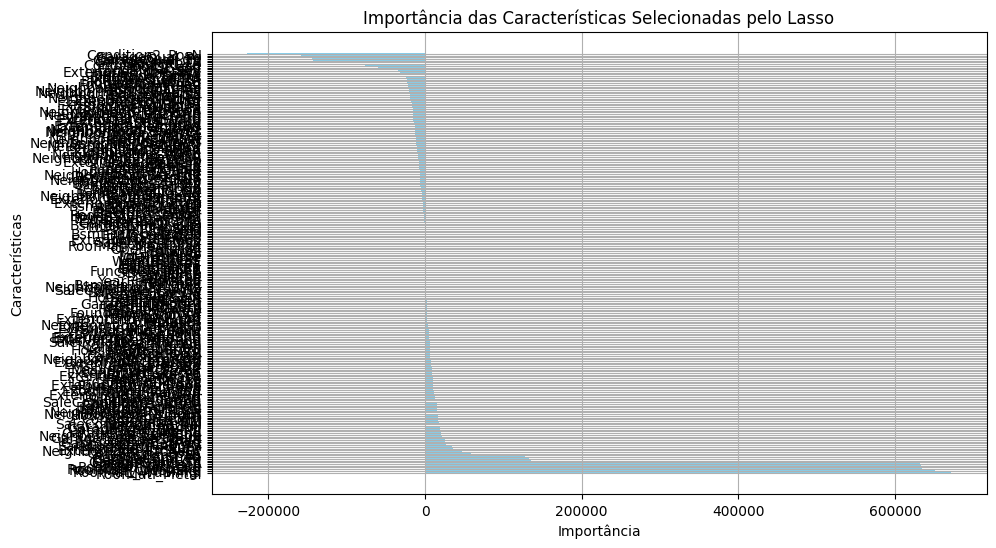

In [63]:
# Gráfico de importância das características
plt.figure(figsize=(10, 6))
plt.barh(lasso_coef.index, lasso_coef['Coefficient'], color='skyblue')
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características Selecionadas pelo Lasso')
plt.grid(True)
plt.show()

3) APRENDIZAGEM SUPERVISIONADA


Mean Squared Error (MSE): 2642483715.194704
R^2 Score: 0.6554926552251863


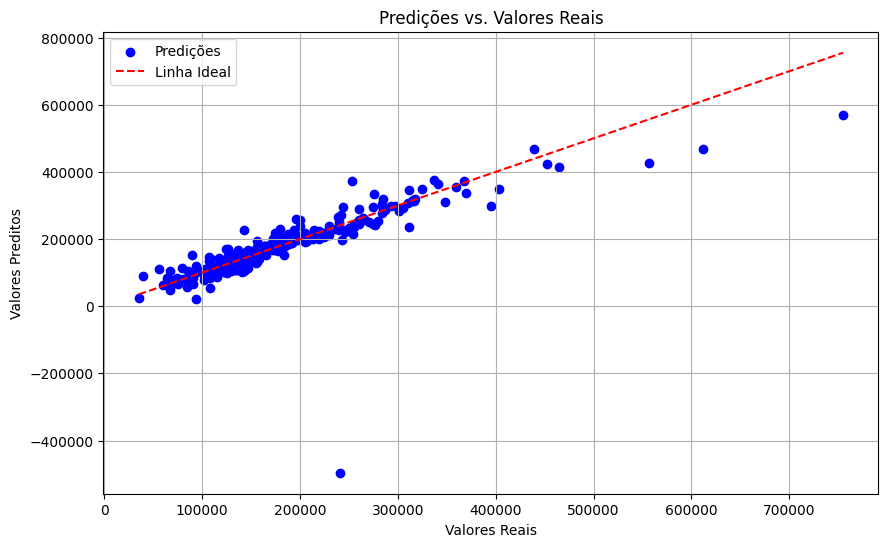

In [65]:

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Predições vs. Valores Reais')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Criando e treinando o modelo de classificação (Regressão Logística)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(conf_matrix)

# Relatório de Classificação
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:")
print(class_report)

Acurácia: 0.01

Matriz de Confusão:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Relatório de Classificação:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       81000       0.00      0.00      0.00         1
       84500       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

4) APRENDIZAGEM NÃO SUPERVISIONADA

Redução de dimensionalidade: Use uma técnica de redução de dimensionalidade para
visualizar os dados em um espaço de menor dimensão.

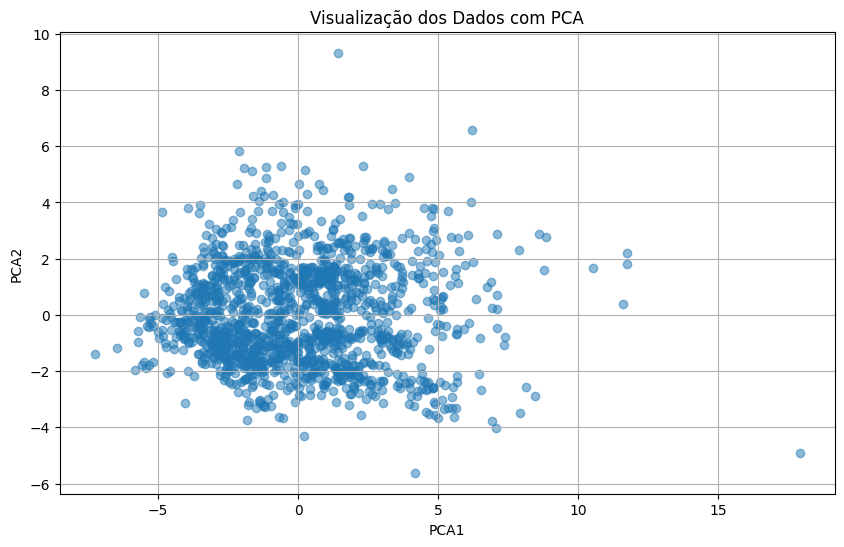

In [73]:
# Normalizar os dados numéricos
numeric_columns = df_encoded.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

# Aplicar PCA (Principal Component Analysis) para reduzir a dimensão para 2 componentes
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_encoded[numeric_columns])

# Adicionar os resultados do PCA ao DataFrame original
df_encoded['PCA1'] = pca_result[:, 0]
df_encoded['PCA2'] = pca_result[:, 1]

# Visualizar os dados no novo espaço de 2 dimensões
plt.figure(figsize=(10, 6))
plt.scatter(df_encoded['PCA1'], df_encoded['PCA2'], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Visualização dos Dados com PCA')
plt.grid(True)
plt.show()